In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# DATA COLLECTION AND PROCESSING

In [3]:
Titanic_data = pd.read_csv("Train.csv")
print(Titanic_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [5]:
Titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
Titanic_data.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
Titanic_data.shape

(891, 12)

In [8]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Categorical Featureset_Type

In [9]:
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
Titanic_data['Age'].mean()

29.69911764705882

In [12]:
Titanic_data['Age'].fillna(Titanic_data['Age'].mean(), inplace=True)

C:\Users\ali\AppData\Local\Temp\ipykernel_10632\4032514764.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic_data['Age'].fillna(Titanic_data['Age'].mean(), inplace=True)


In [13]:
Titanic_data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [19]:
mode_of_Cabin = mode_of_Cabin =Titanic_data .pivot_table(values='Cabin', columns='Sex', aggfunc=(lambda x: x.mode()[0]))

In [20]:
print(mode_of_Cabin)

Sex   female male
Cabin     G6   F2


In [21]:
miss_values =Titanic_data ['Cabin'].isnull()

In [22]:
print(miss_values)

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool


In [23]:
Titanic_data.loc[miss_values, 'Cabin'] = Titanic_data.loc[miss_values,'Sex'].apply(lambda x: mode_of_Cabin[x])

In [24]:
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [25]:
Titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [46]:
mode_of_embarked = mode_of_embarked =Titanic_data .pivot_table(values='Embarked', columns='Survived', aggfunc=(lambda x: x.mode()[0]))

In [47]:
print(mode_of_embarked)

Survived  0  1
Embarked  S  S


In [48]:
miss_values =Titanic_data ['Embarked'].isnull()

In [49]:
print(miss_values)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool


In [51]:
Titanic_data.loc[miss_values, 'Embarked'] = Titanic_data.loc[miss_values,'Sex'].apply(lambda x: mode_of_Cabin[x])

In [52]:
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

# DATA ANALYSIS

In [53]:
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
sns.set()

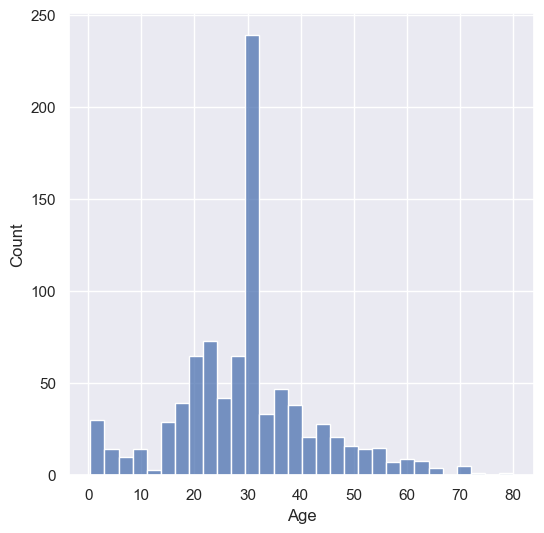

In [56]:
plt.figure(figsize=(6,6))
sns.histplot(Titanic_data['Age'])
plt.show()

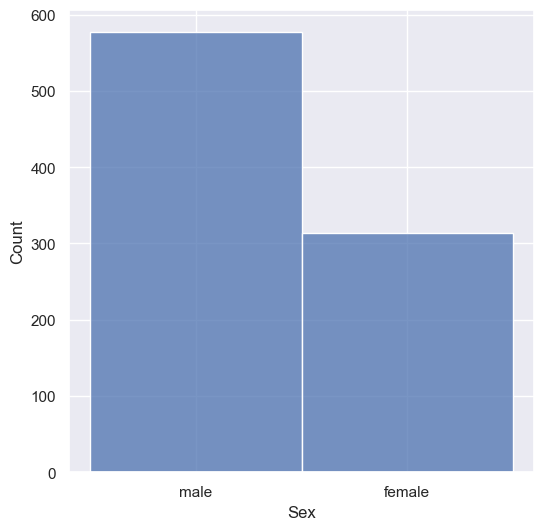

In [57]:
plt.figure(figsize=(6,6))
sns.histplot(Titanic_data['Sex'])
plt.show()

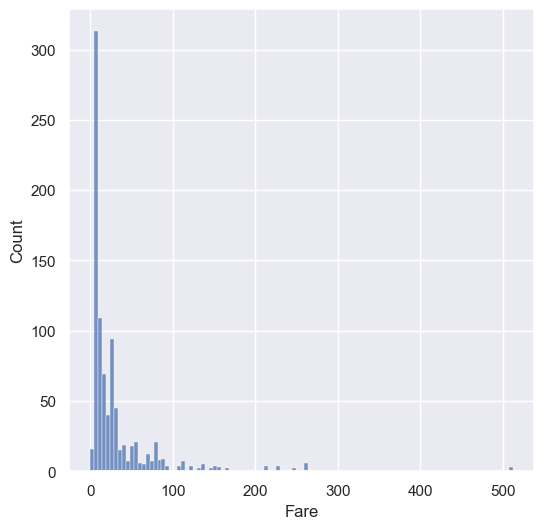

In [58]:
plt.figure(figsize=(6,6))
sns.histplot(Titanic_data['Fare'])
plt.show()

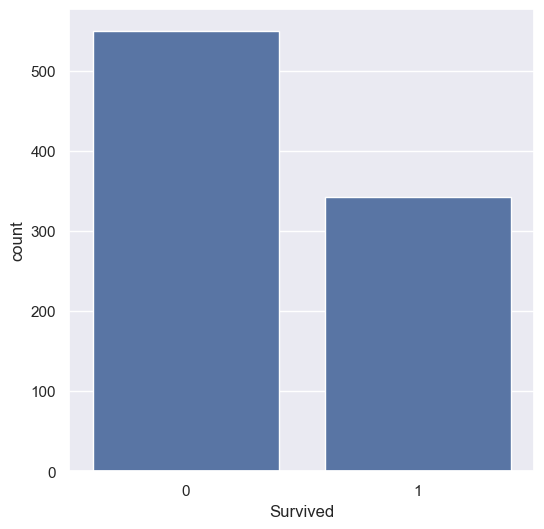

In [59]:
plt.figure(figsize=(6,6))
sns.countplot(x='Survived', data=Titanic_data)
plt.show()

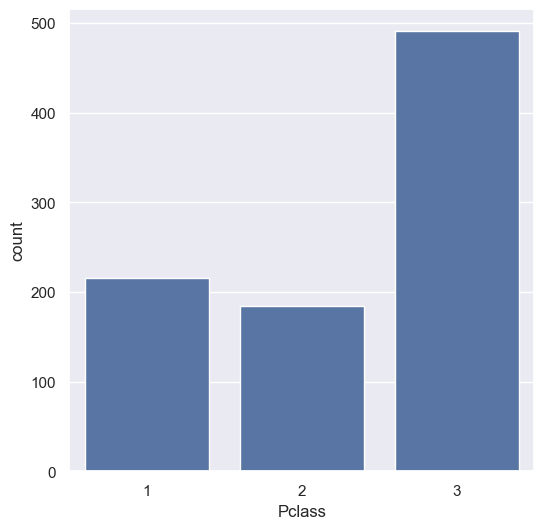

In [60]:
plt.figure(figsize=(6,6))
sns.countplot(x='Pclass', data=Titanic_data)
plt.show()

# DATA PRE PROCESSING

In [61]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,F2,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F2,S


In [62]:
Titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [64]:
Titanic_data.replace({'Sex': {'male':'Male', 'female':'Female'}}, inplace=True)

In [65]:
Titanic_data['Sex'].value_counts()

Sex
Male      577
Female    314
Name: count, dtype: int64

# LABEL ENCODING

In [66]:
encoder = LabelEncoder()

In [67]:
Titanic_data['Name'] = encoder.fit_transform(Titanic_data['Name'])
Titanic_data['Sex'] = encoder.fit_transform(Titanic_data['Sex'])
Titanic_data['Ticket'] = encoder.fit_transform(Titanic_data['Ticket'])
Titanic_data['Cabin'] = encoder.fit_transform(Titanic_data['Cabin'])
Titanic_data['Embarked'] = encoder.fit_transform(Titanic_data['Embarked'])

In [68]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,141,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,145,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,141,2


# SPLITING FEATURES AND TARGET

In [69]:
X = Titanic_data.drop(columns='Cabin', axis=1)
Y = Titanic_data['Cabin']

In [70]:
print(X)

     PassengerId  Survived  Pclass  Name  Sex        Age  SibSp  Parch  \
0              1         0       3   108    1  22.000000      1      0   
1              2         1       1   190    0  38.000000      1      0   
2              3         1       3   353    0  26.000000      0      0   
3              4         1       1   272    0  35.000000      1      0   
4              5         0       3    15    1  35.000000      0      0   
..           ...       ...     ...   ...  ...        ...    ...    ...   
886          887         0       2   548    1  27.000000      0      0   
887          888         1       1   303    0  19.000000      0      0   
888          889         0       3   413    0  29.699118      1      2   
889          890         1       1    81    1  26.000000      0      0   
890          891         0       3   220    1  32.000000      0      0   

     Ticket     Fare  Embarked  
0       523   7.2500         2  
1       596  71.2833         0  
2       669 

In [71]:
print(Y)

0      141
1       81
2      145
3       55
4      141
      ... 
886    141
887     30
888    145
889     60
890    141
Name: Cabin, Length: 891, dtype: int32


# Splitting the data into Training data & Testing Data

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=112)

In [73]:
print("Training data shape:", X_train.shape, Y_train.shape)
print("Testing data shape:", X_test.shape, Y_test.shape)

Training data shape: (712, 11) (712,)
Testing data shape: (179, 11) (179,)


# Machine Learning Model Training

In [74]:
regressor = XGBRegressor()

In [75]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# EVALUATION

In [76]:
training_data_prediction = regressor.predict(X_train)

In [77]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [78]:
print('R Squared value = ', r2_train)

R Squared value =  0.9999575775715117


In [79]:
test_data_prediction = regressor.predict(X_test)

In [80]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)